In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install ultralytics
!pip install opencv-python

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kCSJMamSYOR16E0MwTUy")
project = rf.workspace("majorproject-rdrhf").project("pothole-detection-segmentation-tou1d")
version = project.version(1)
dataset = version.download("yolov11")




loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/Pothole-Detection-Segmentation-1'

In [ ]:
#Load the YOLO11-Seg Model ## This is small
model = YOLO("yolo11s-seg.pt")

100%|██████████| 19.7M/19.7M [00:00<00:00, 184MB/s]


In [ ]:
#Train the Model on a Custom Dataset
results = model.train(task='segment', mode = 'train', data = "/content/Pothole-Detection-Segmentation-1/data.yaml", epochs = 50)

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-Detection-Segmentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

100%|██████████| 755k/755k [00:00<00:00, 9.99MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 13                  -1  1    443776  ultralytics.nn.modules.block.C3k2            [768, 256, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    127680  ultralytics.nn.modules.block.C3k2            [512, 128, 1, False]          
 17                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1    345472  ultralytics.nn.modules.block.C3k2            [384, 256, 1, False]          
 20                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1185.4±368.1 MB/s, size: 55.9 KB)


train: Scanning /content/Pothole-Detection-Segmentation-1/train/labels... 545 images, 0 backgrounds, 0 corrupt: 100%|██████████| 545/545 [00:00<00:00, 1883.12it/s]


train: New cache created: /content/Pothole-Detection-Segmentation-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 712.8±483.5 MB/s, size: 75.5 KB)


val: Scanning /content/Pothole-Detection-Segmentation-1/valid/labels... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<00:00, 532.97it/s]


val: New cache created: /content/Pothole-Detection-Segmentation-1/valid/labels.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.87G       1.55      2.942      2.679      1.537          3        640: 100%|██████████| 35/35 [00:20<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        155        405     0.0016      0.042   0.000661   0.000296   0.000598    0.00741   0.000185      7e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.13G      1.624      2.699      1.865      1.581          3        640: 100%|██████████| 35/35 [00:15<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        155        405      0.071     0.0568     0.0154    0.00534      0.054     0.0469    0.00984    0.00268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.15G      1.688      2.712      1.815       1.64          9        640: 100%|██████████| 35/35 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        155        405      0.091      0.212     0.0452      0.015     0.0804      0.222     0.0353     0.0104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.22G      1.673      2.678      1.699      1.593          3        640: 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        155        405    0.00107    0.00494   9.47e-05   4.77e-05   0.000765    0.00247   3.83e-05   2.45e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.26G      1.609       2.66      1.682      1.554          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        155        405   0.000566    0.00988   0.000226   6.37e-05   0.000445     0.0148   9.92e-05   2.57e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50       6.3G      1.596      2.611      1.637      1.518          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        155        405       0.47      0.319      0.333      0.141      0.444      0.304      0.295      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.33G      1.564      2.568      1.544      1.521         12        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        155        405      0.405      0.405      0.341      0.163      0.425      0.386      0.335       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.39G      1.512      2.531        1.5      1.469          6        640: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        155        405      0.434      0.442      0.377      0.193      0.452      0.449      0.368      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.43G      1.489      2.365      1.439      1.467          5        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        155        405      0.564      0.514      0.527      0.253      0.602      0.474      0.522      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.48G       1.51      2.497      1.447      1.464          2        640: 100%|██████████| 35/35 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        155        405      0.512      0.523      0.512      0.263      0.522      0.533      0.526      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50       6.5G      1.467      2.386      1.398      1.438          4        640: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        155        405      0.656      0.472      0.546      0.247      0.593      0.514      0.557      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.56G      1.422      2.293      1.384      1.401          2        640: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        155        405      0.571      0.568      0.576      0.302      0.596      0.586       0.59      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.61G      1.369      2.261      1.321      1.386          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405      0.624      0.635      0.647      0.354      0.616      0.605      0.622      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.65G      1.354      2.211      1.256      1.391          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        155        405      0.675      0.607      0.676       0.36      0.683      0.615      0.682      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.67G      1.371      2.315      1.291      1.381          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405      0.661      0.595      0.645       0.36      0.648       0.63      0.647       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.73G      1.358      2.176      1.221       1.37          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all        155        405      0.676      0.615      0.676      0.373      0.677      0.607      0.662      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.78G      1.287      2.126       1.22      1.349          2        640: 100%|██████████| 35/35 [00:15<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        155        405      0.659      0.573      0.631      0.363      0.657      0.573       0.62      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.82G      1.299      2.111      1.168      1.354          7        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405      0.628       0.65      0.677      0.392      0.626      0.652      0.677      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.84G      1.289      2.094      1.166      1.315          5        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        155        405      0.664      0.578      0.634      0.349      0.653      0.567       0.61      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.91G       1.28      2.083       1.16      1.329          2        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        155        405      0.655      0.595      0.647       0.36      0.657      0.593      0.638      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.95G       1.29       2.06      1.114      1.297          8        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405       0.76      0.649      0.739       0.42      0.756      0.657      0.739      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.99G        1.3      2.113      1.138      1.315         15        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        155        405      0.794      0.646      0.736      0.426      0.782      0.647      0.729      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.02G      1.242      2.001      1.069      1.301          2        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        155        405      0.796      0.627      0.747      0.455      0.783      0.637      0.745      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.08G      1.231      1.988      1.052      1.271         20        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        155        405      0.724      0.635      0.723       0.43      0.732      0.642      0.737      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.12G       1.22      1.948      1.052      1.277         13        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        155        405      0.739      0.621      0.705      0.425      0.744       0.64      0.718      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.17G      1.226      2.036      1.064      1.248          4        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        155        405      0.759      0.679      0.756      0.456      0.762      0.681      0.755      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.19G      1.189      1.951       1.03      1.266          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405      0.785      0.703      0.795      0.476      0.803      0.699      0.796       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.26G      1.215      1.994      1.085      1.289          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        155        405      0.682      0.752      0.773      0.457      0.682      0.752      0.778      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50       7.3G       1.19      1.944     0.9888      1.237          5        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        155        405      0.741      0.721      0.782      0.467      0.739      0.719      0.771      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.34G      1.156       1.88     0.9441      1.221          2        640: 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405      0.777      0.705      0.784      0.471      0.774      0.704      0.777      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.36G      1.155      1.894     0.9692      1.239          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        155        405      0.801      0.654      0.769       0.47      0.792      0.659      0.755      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.43G      1.133      1.878     0.9455      1.219          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        155        405      0.756      0.789      0.827      0.533      0.748      0.788      0.827      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.42G      1.094      1.818     0.8637      1.187          5        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        155        405       0.77      0.701       0.79      0.487       0.77      0.701      0.786      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.61G      1.131      1.871      0.987      1.228          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        155        405      0.723      0.769      0.809      0.511      0.816      0.701      0.809      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.61G      1.139      1.928     0.8719      1.225          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        155        405      0.744      0.777      0.808      0.506      0.745       0.76      0.798      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.61G      1.083      1.776      0.853      1.173         12        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        155        405      0.801      0.704      0.817      0.523      0.801      0.704      0.813      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.61G      1.083      1.796     0.8507      1.175         10        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        155        405      0.777      0.774      0.828      0.524      0.773      0.789      0.812      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.61G      1.073      1.773     0.8318      1.181          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        155        405      0.817       0.78      0.836      0.539       0.82      0.797      0.839      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.61G      1.065      1.713     0.8403      1.163          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        155        405      0.843      0.703      0.824      0.549      0.843      0.703      0.828      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.61G      1.052      1.744     0.7618      1.161          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        155        405      0.825      0.793      0.862       0.56      0.845      0.763      0.851       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.61G      1.051      1.713     0.7835      1.171          1        640: 100%|██████████| 35/35 [00:15<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        155        405      0.786      0.751      0.822      0.528      0.784      0.748       0.82      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.61G      1.015      1.661     0.7672      1.158          5        640: 100%|██████████| 35/35 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        155        405        0.8      0.799      0.859      0.557      0.798      0.808      0.859       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.61G      1.004      1.623     0.7005      1.135          2        640: 100%|██████████| 35/35 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        155        405       0.83      0.794      0.874      0.585       0.83        0.8      0.877      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.61G     0.9804      1.667      0.687      1.147          3        640: 100%|██████████| 35/35 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        155        405      0.855       0.79      0.874      0.587      0.839      0.796      0.879      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.65G     0.9803      1.622      0.667      1.183          1        640: 100%|██████████| 35/35 [00:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        155        405      0.819      0.794      0.862       0.58       0.81      0.812      0.863      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.69G     0.9275      1.523     0.6775      1.109          1        640: 100%|██████████| 35/35 [00:13<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        155        405      0.803      0.822      0.872      0.592      0.804      0.825      0.874      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.71G      1.014      1.634     0.6616      1.195          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        155        405      0.901      0.775      0.891      0.605      0.904      0.778      0.893      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.78G     0.9942      1.576     0.6397      1.186          1        640: 100%|██████████| 35/35 [00:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        155        405      0.877       0.82      0.891      0.612      0.874      0.817      0.892      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.82G     0.8968      1.496     0.5908      1.068          1        640: 100%|██████████| 35/35 [00:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        155        405      0.875       0.81      0.897      0.618      0.875      0.816      0.893      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.86G     0.9293      1.555     0.6617      1.107          5        640: 100%|██████████| 35/35 [00:13<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        155        405      0.873      0.812      0.896      0.622      0.873      0.812      0.894      0.595



50 epochs completed in 0.246 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:01,  2.28it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


                   all        155        405      0.872      0.811      0.896      0.622      0.872      0.811      0.893      0.596
Speed: 0.4ms preprocess, 6.8ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/segment/train


In [ ]:
!gdown "https://drive.google.com/uc?id=1DnQ3jNXUn4SxMjW5KtHGfzjNHY79VjR3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1DnQ3jNXUn4SxMjW5KtHGfzjNHY79VjR3&confirm=t
To: /content/best.pt
100% 20.5M/20.5M [00:00<00:00, 172MB/s]


In [ ]:
train_path = "/content/runs/segment/train"

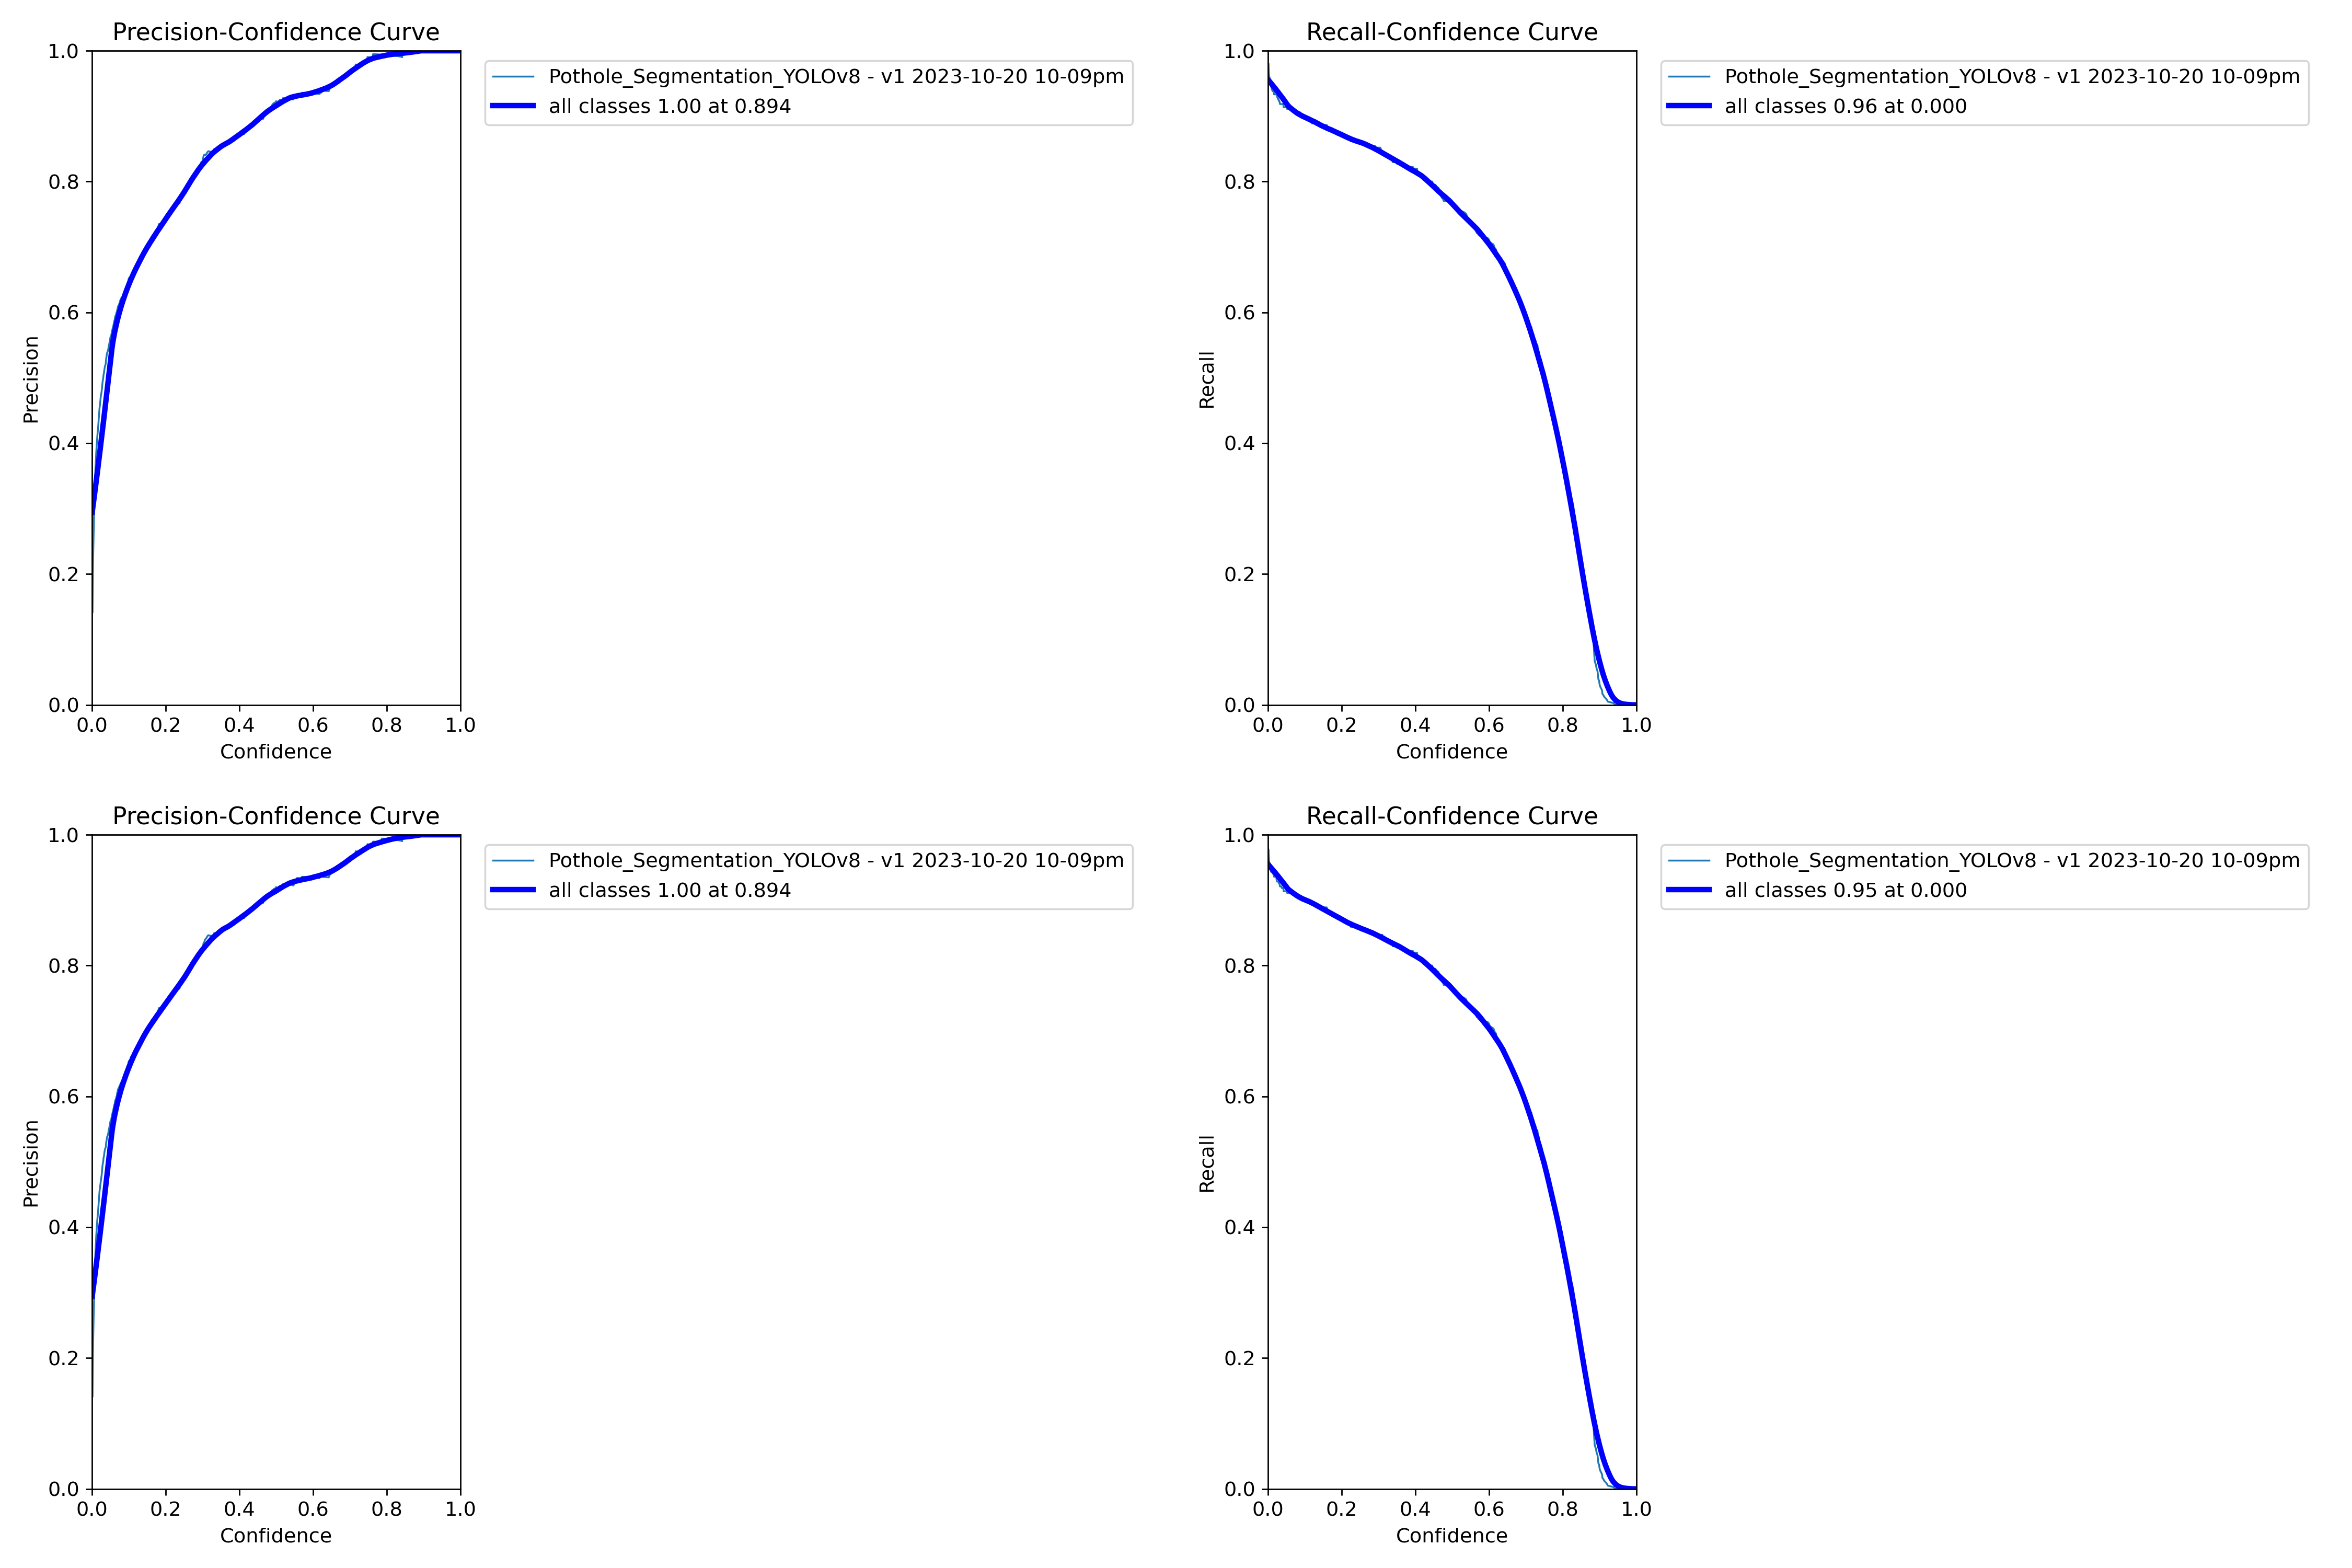

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os # Import os module to check file existence

#Load your images using OpenCV
img1_path = f"{train_path}/BoxP_curve.png"
img2_path = f"{train_path}/BoxR_curve.png"
img3_path = f"{train_path}/MaskP_curve.png"
img4_path = f"{train_path}/MaskR_curve.png"

# Check if images exist before loading
if not os.path.exists(img1_path):
    print(f"Error: Image not found at {img1_path}")
    img1 = None
else:
    img1 = cv2.imread(img1_path)

if not os.path.exists(img2_path):
    print(f"Error: Image not found at {img2_path}")
    img2 = None
else:
    img2 = cv2.imread(img2_path)

if not os.path.exists(img3_path):
    print(f"Error: Image not found at {img3_path}")
    img3 = None
else:
    img3 = cv2.imread(img3_path)

if not os.path.exists(img4_path):
    print(f"Error: Image not found at {img4_path}")
    img4 = None
else:
    img4 = cv2.imread(img4_path)

# Check if all images were loaded successfully before proceeding
if img1 is not None and img2 is not None and img3 is not None and img4 is not None:
    #Concatenate the images horizontally
    top_row = cv2.hconcat([img1, img2])
    botton_row = cv2.hconcat([img3, img4])

    #Concatenate the two rows vertically
    grid = cv2.vconcat([top_row, botton_row])

    #Display the concatenated images
    cv2_imshow(grid)
else:
    print("Could not load all required images. Skipping display.")

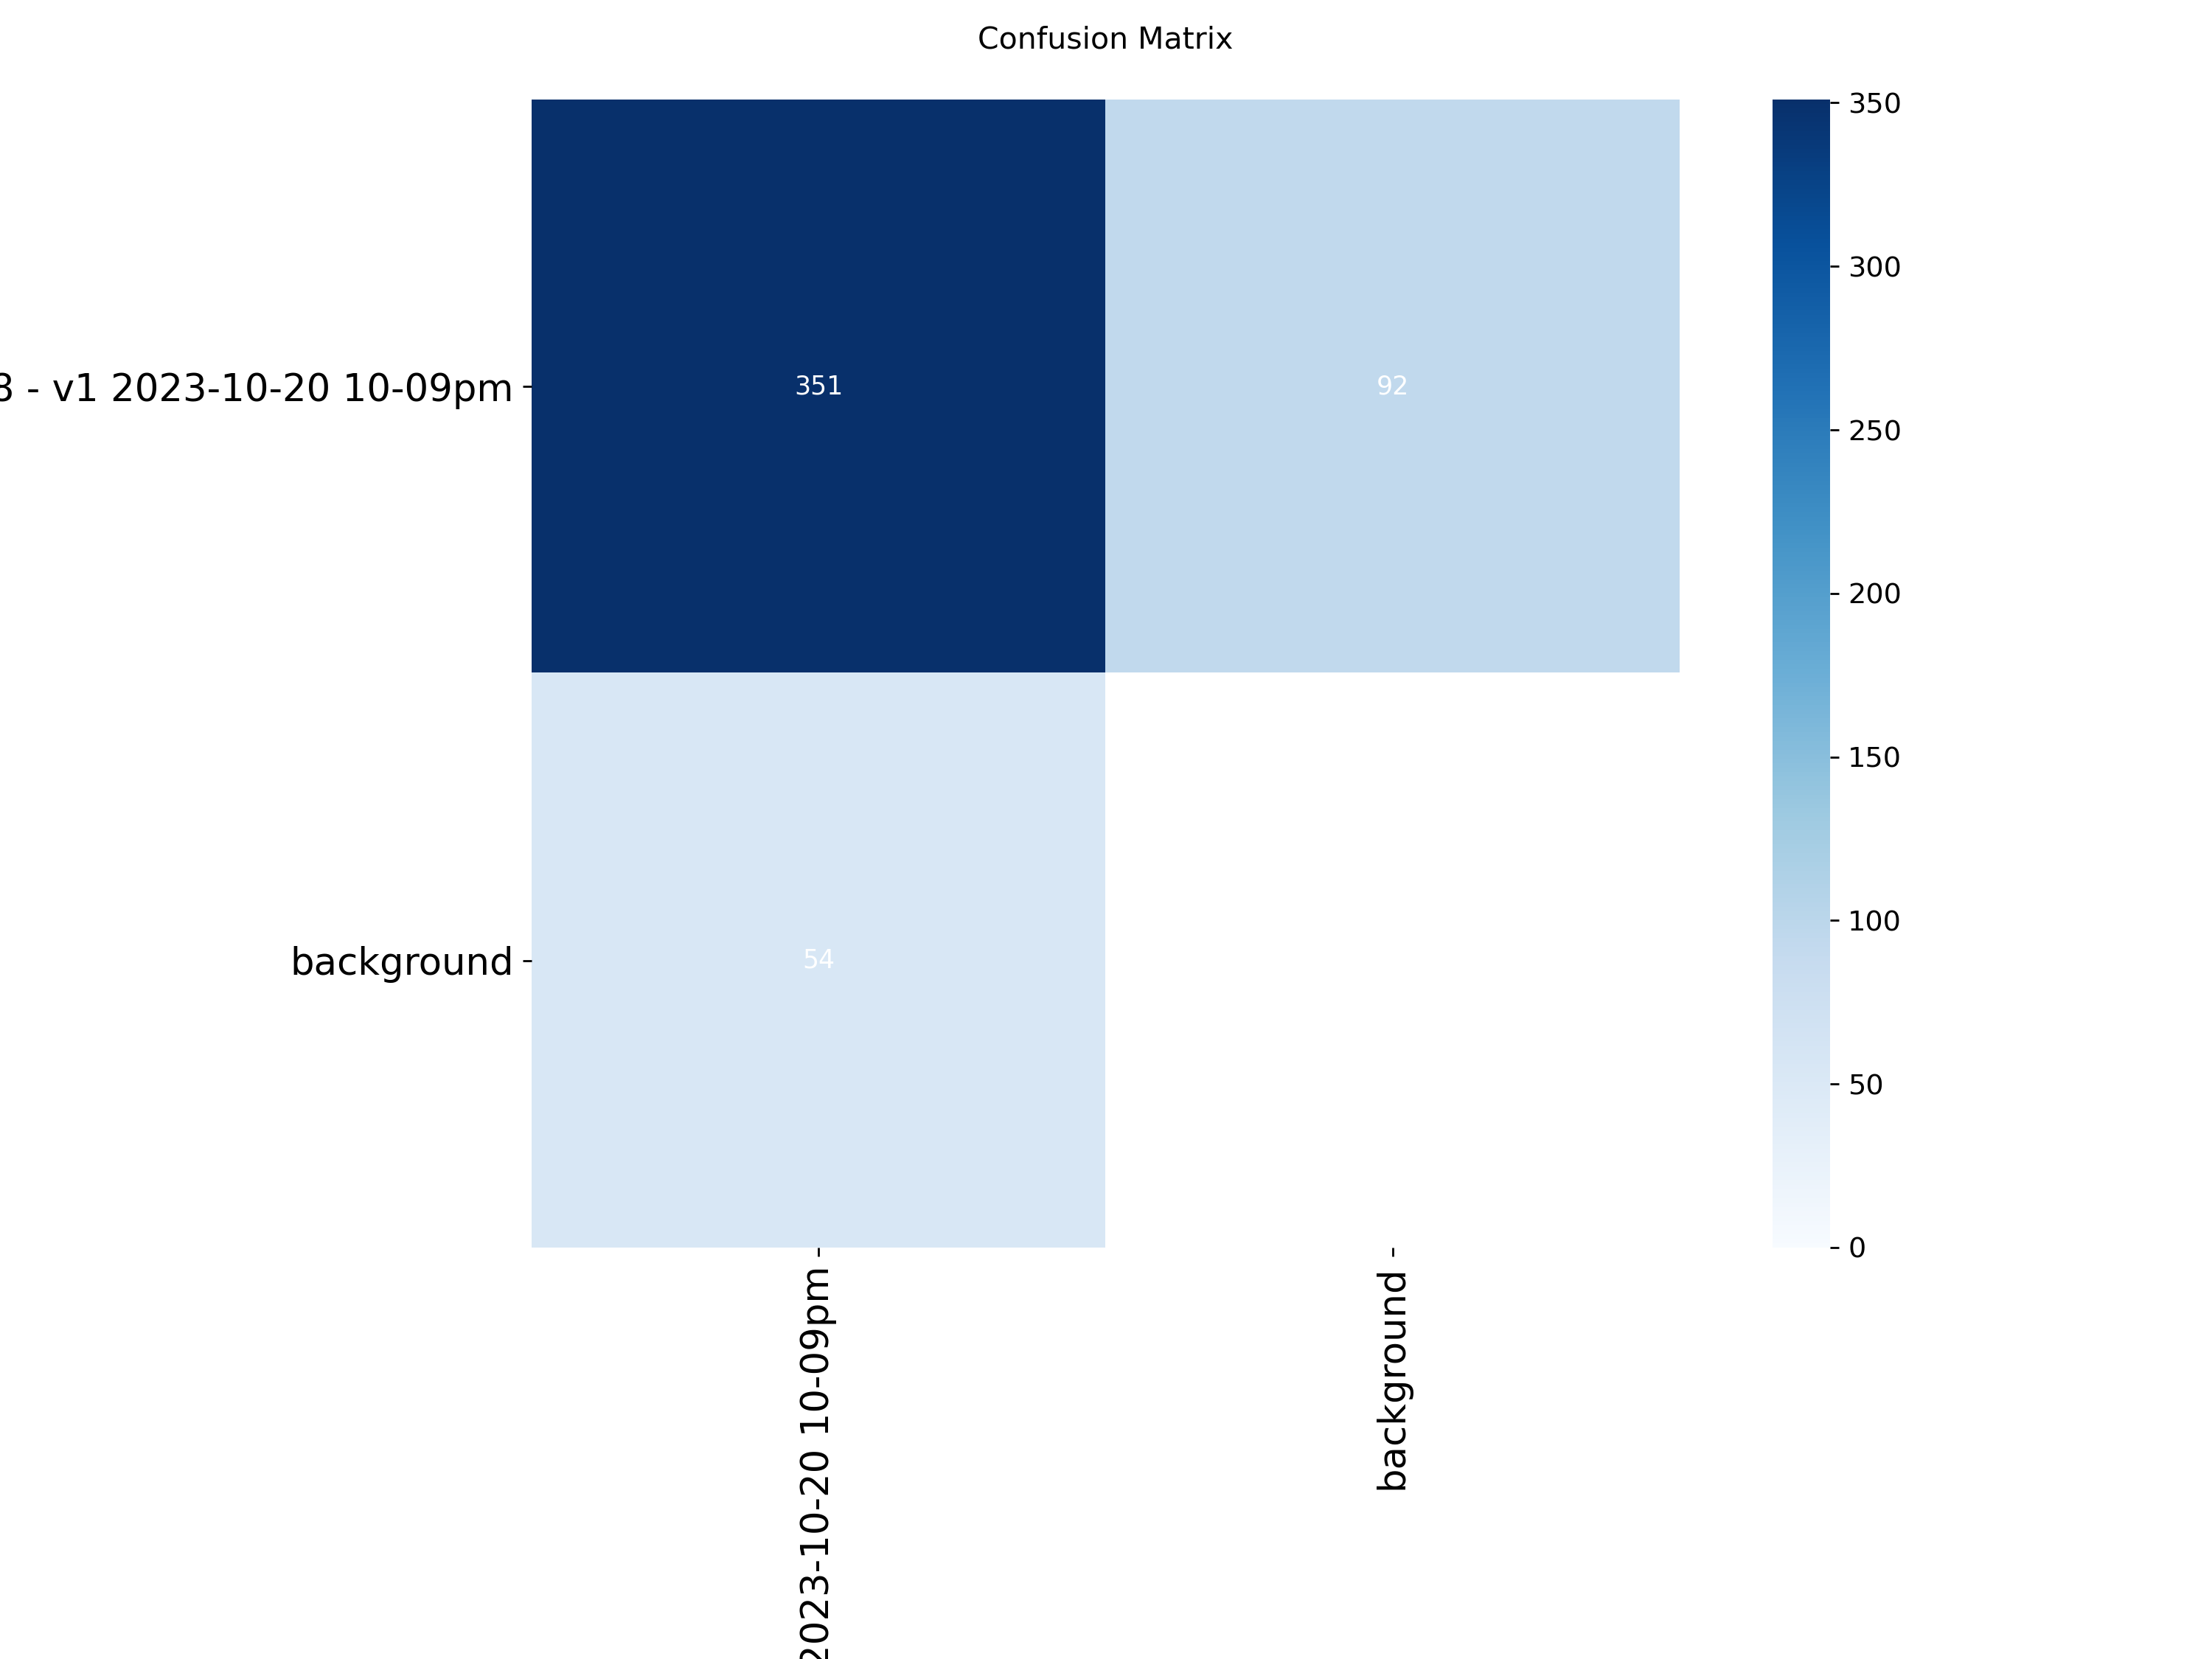

In [ ]:
Image("/content/runs/segment/train/confusion_matrix.png", width = 800)

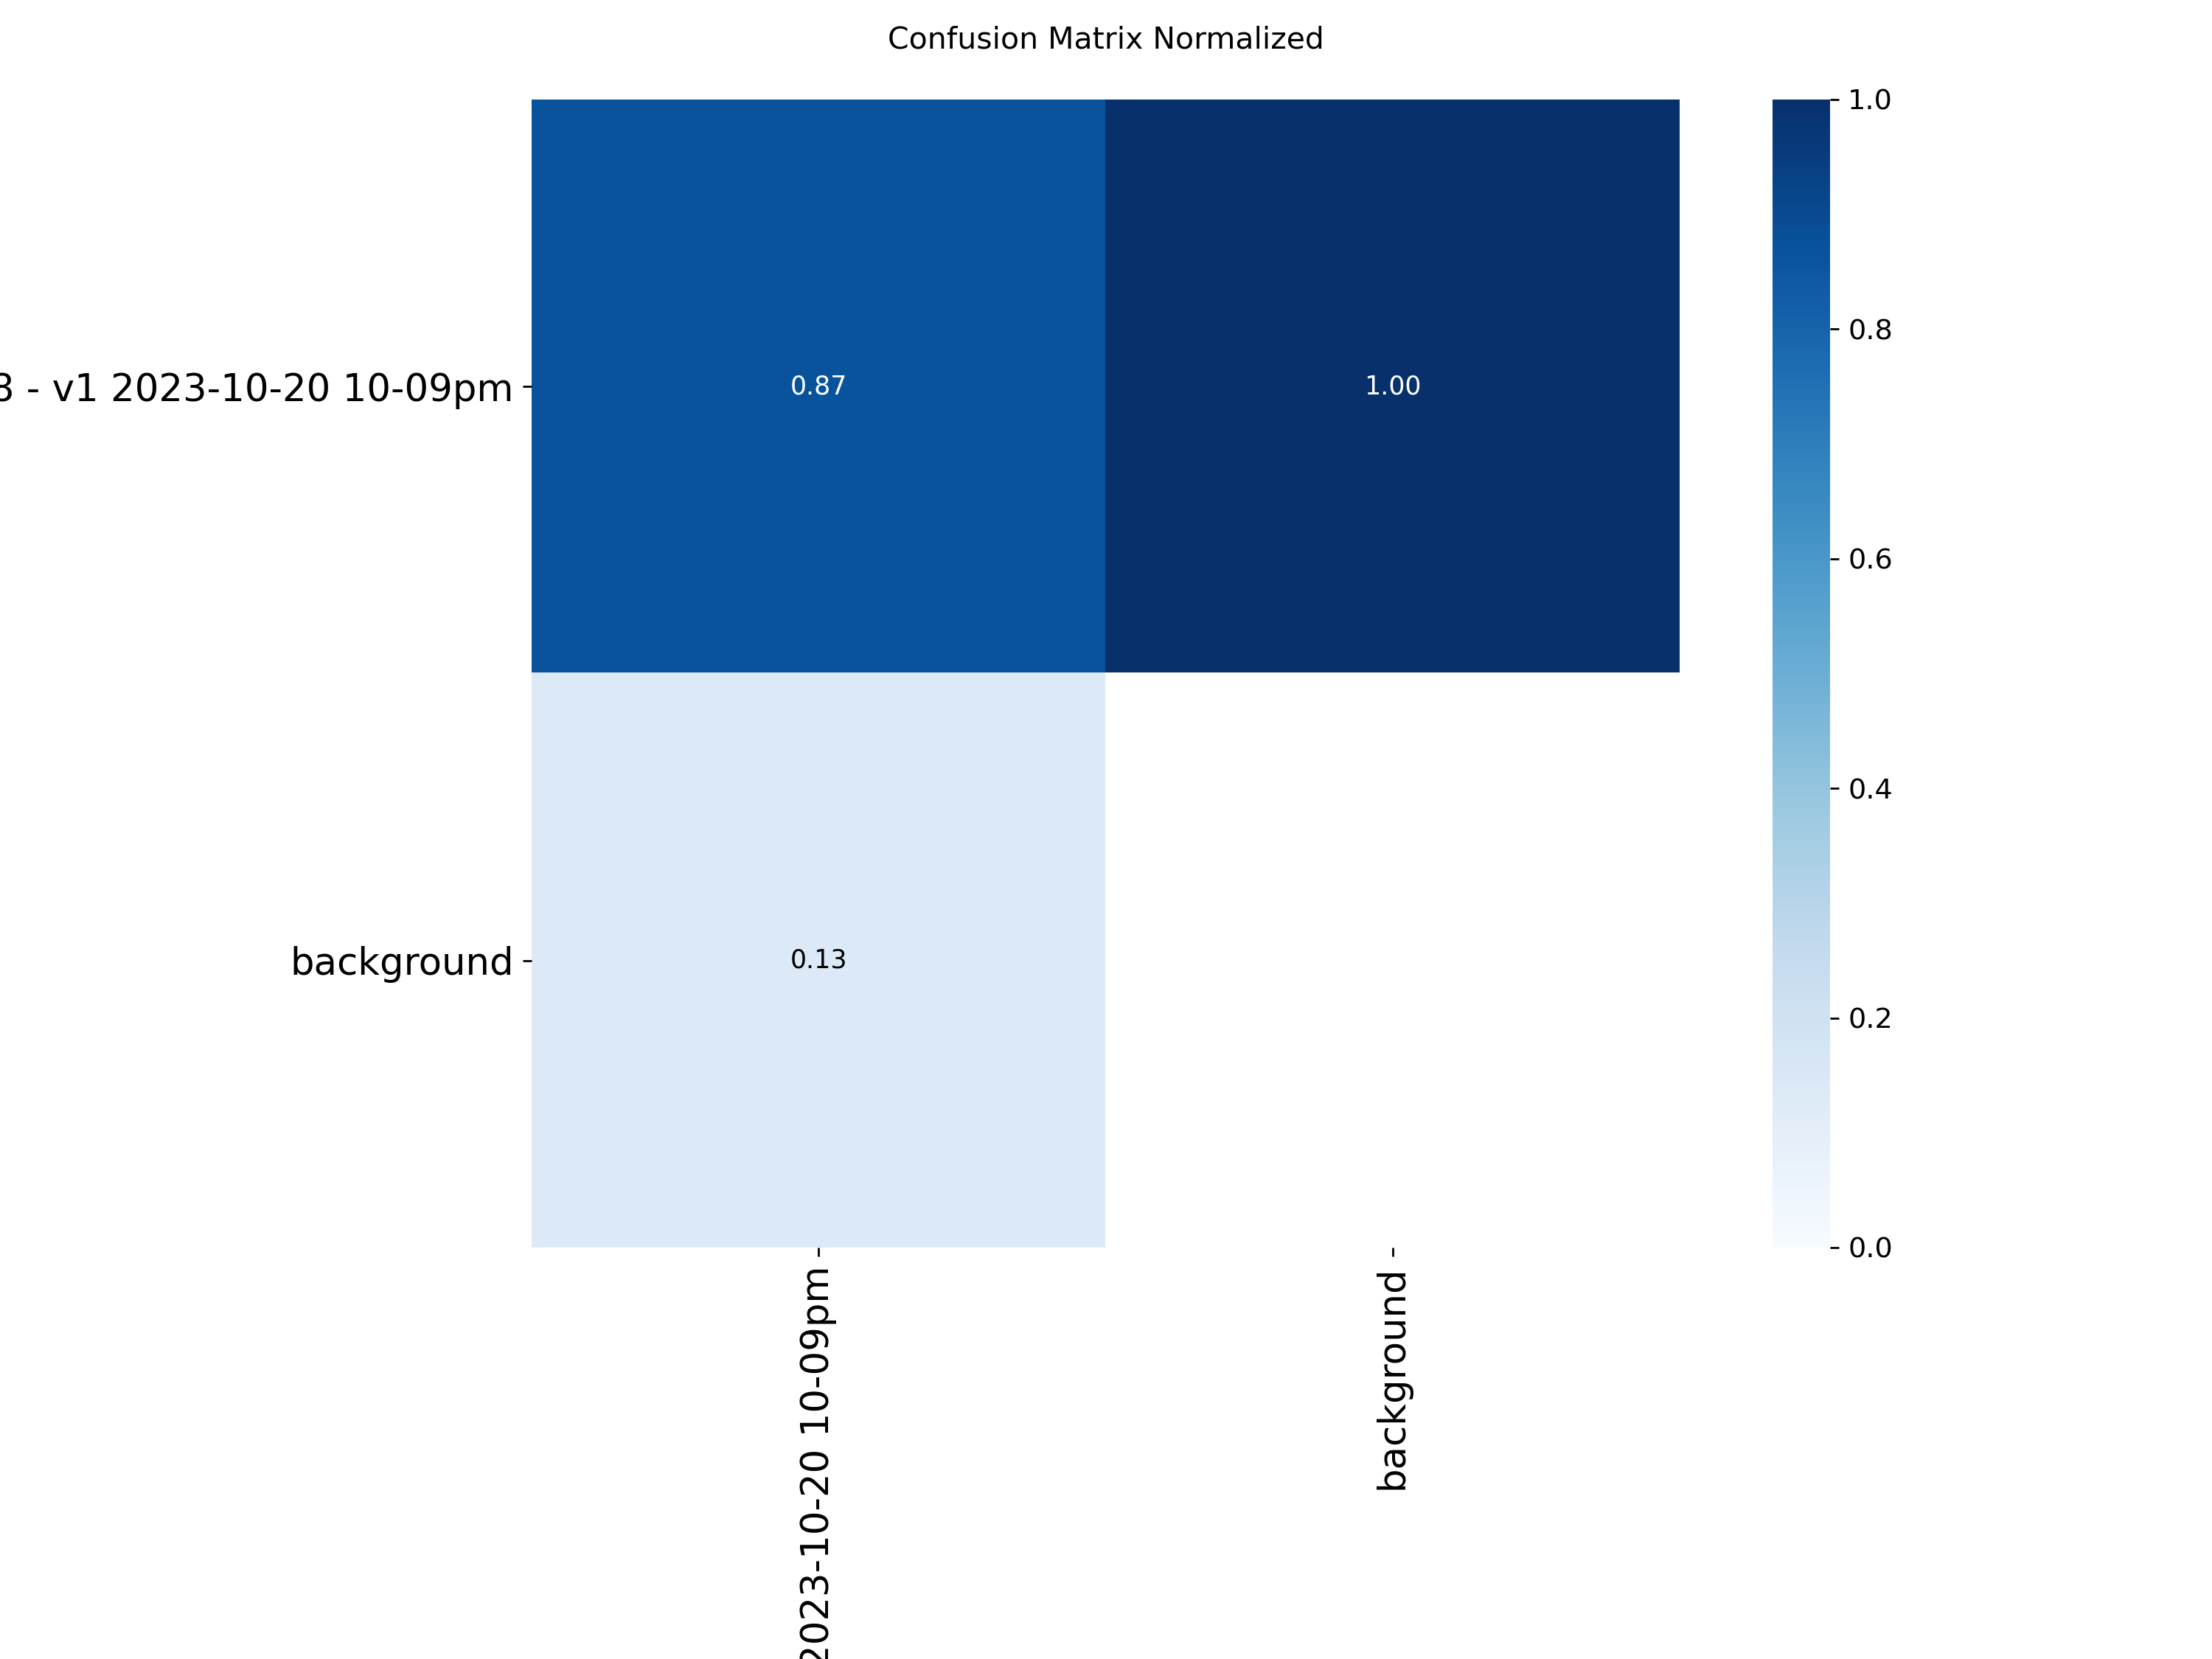

In [ ]:
Image("/content/runs/segment/train/confusion_matrix_normalized.png", width = 800)

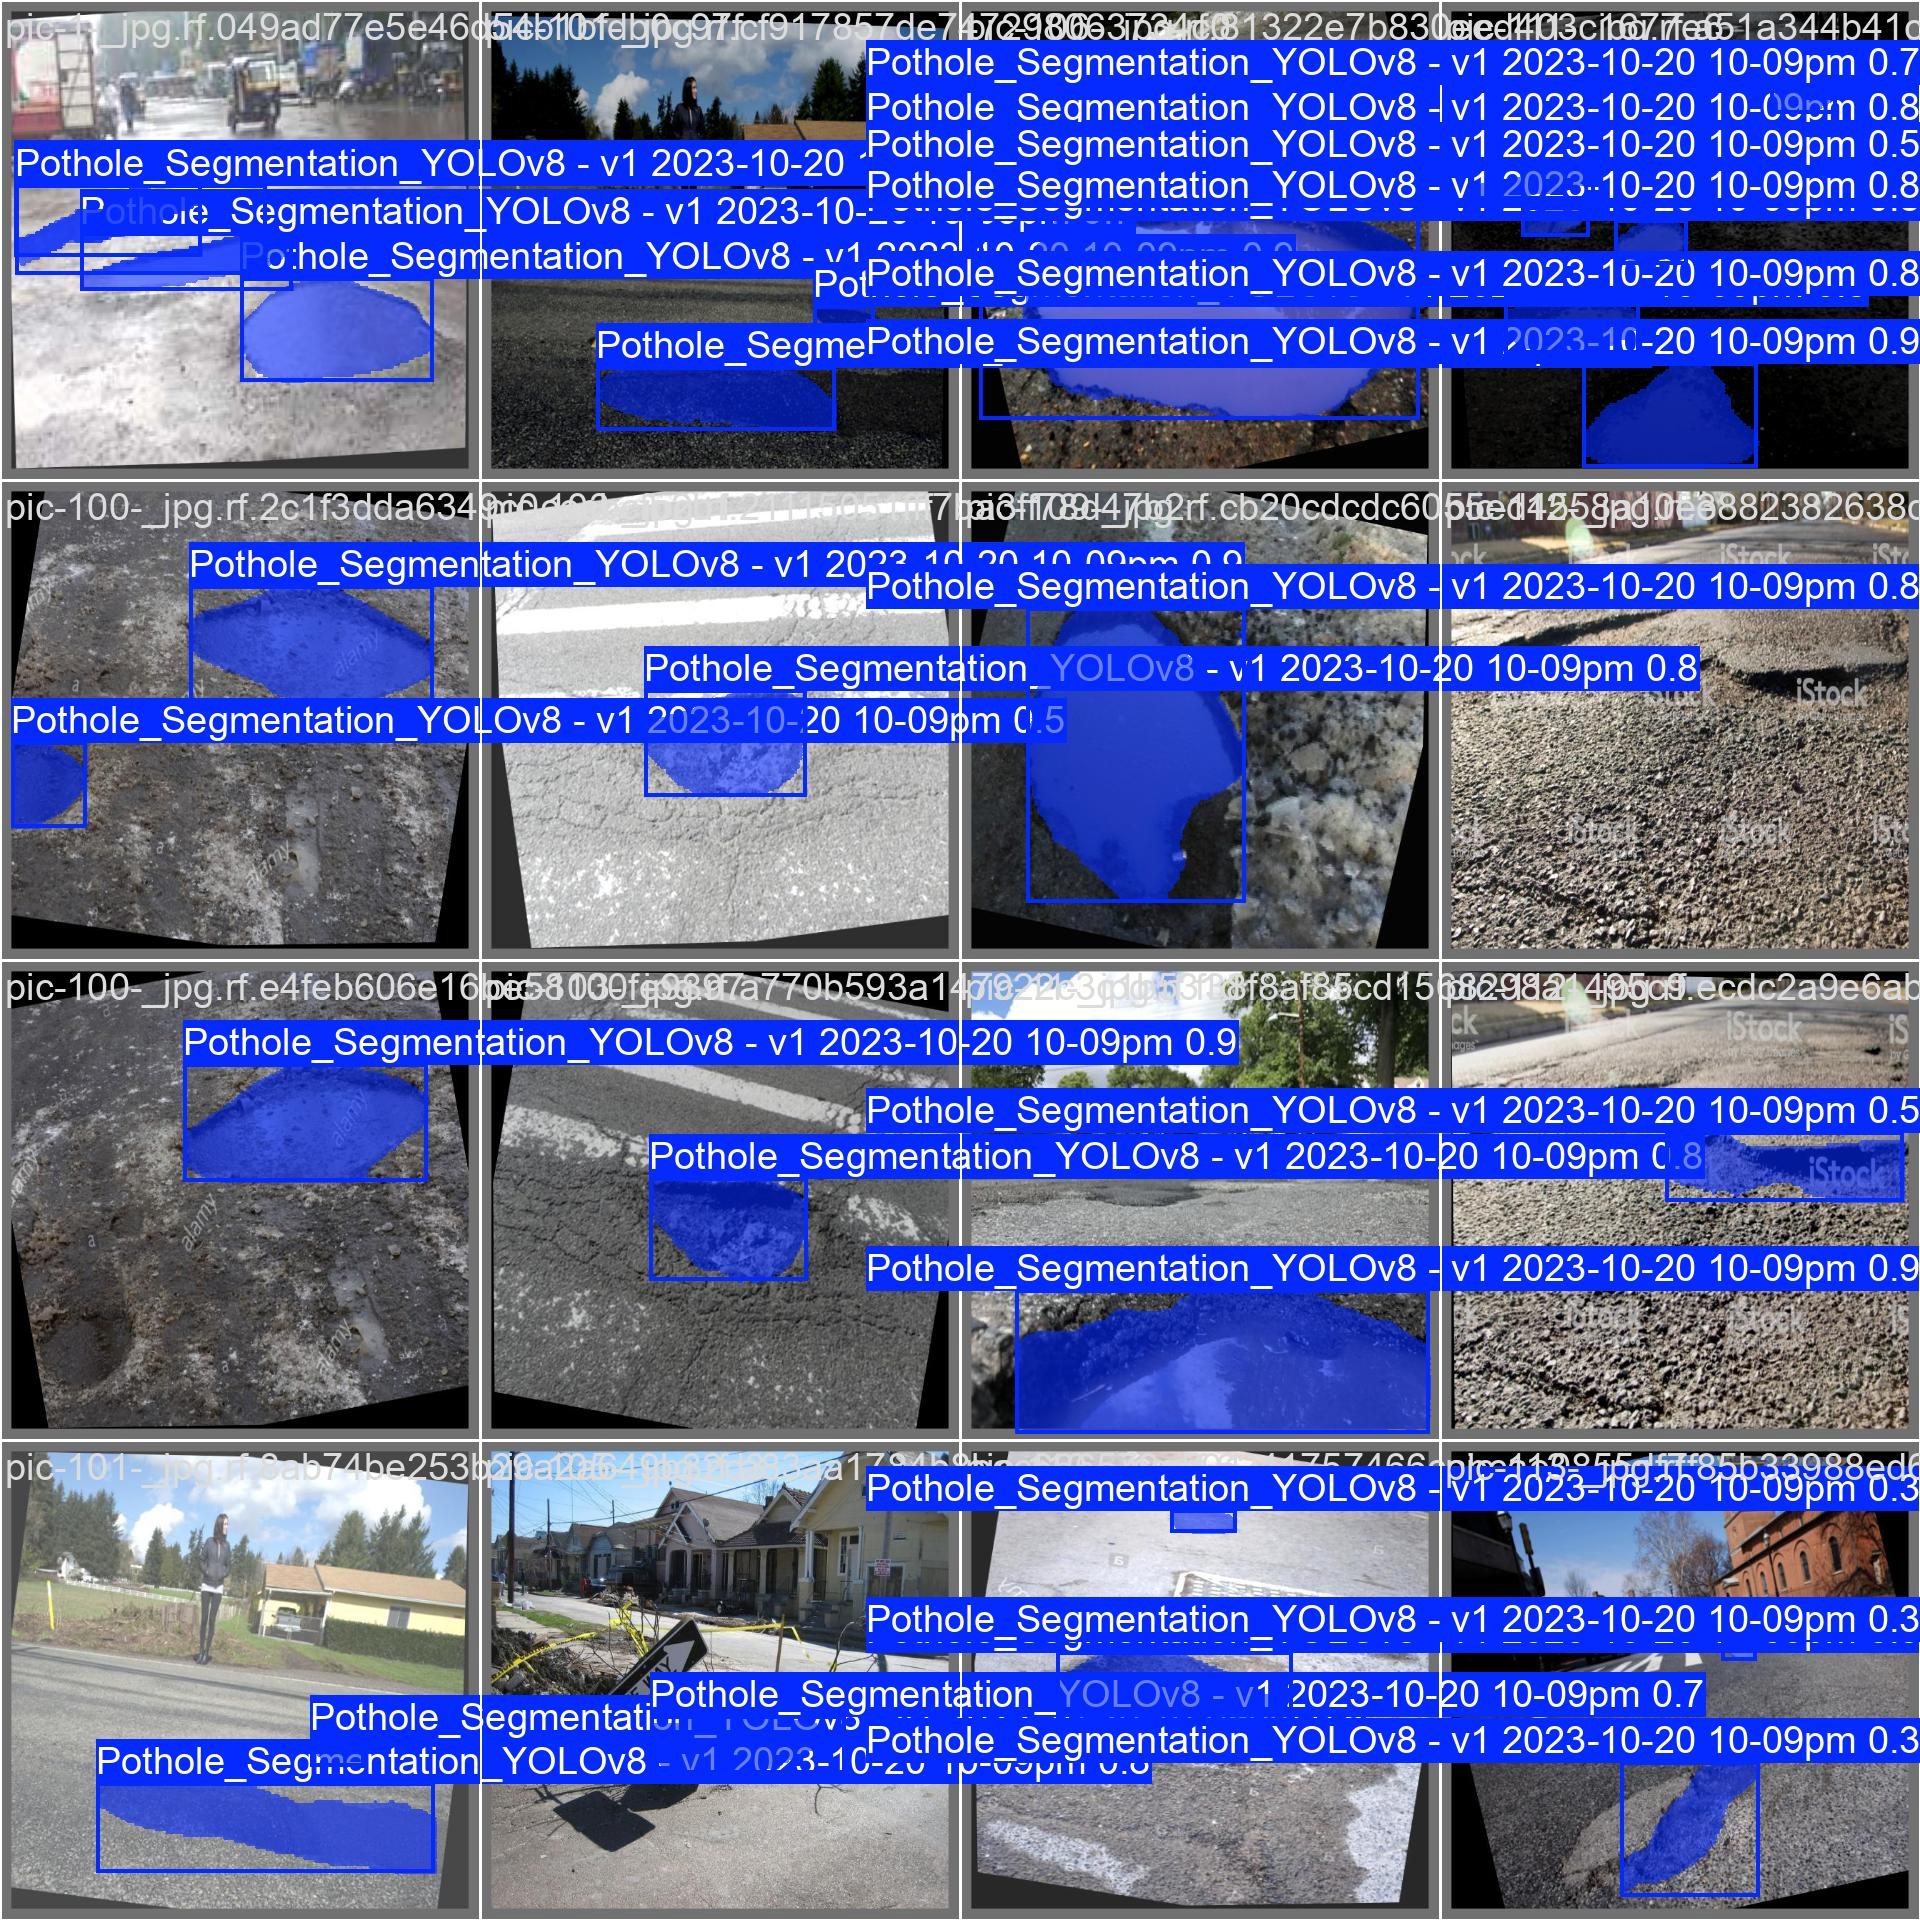

In [ ]:
Image("/content/runs/segment/train/val_batch0_pred.jpg", width = 800)

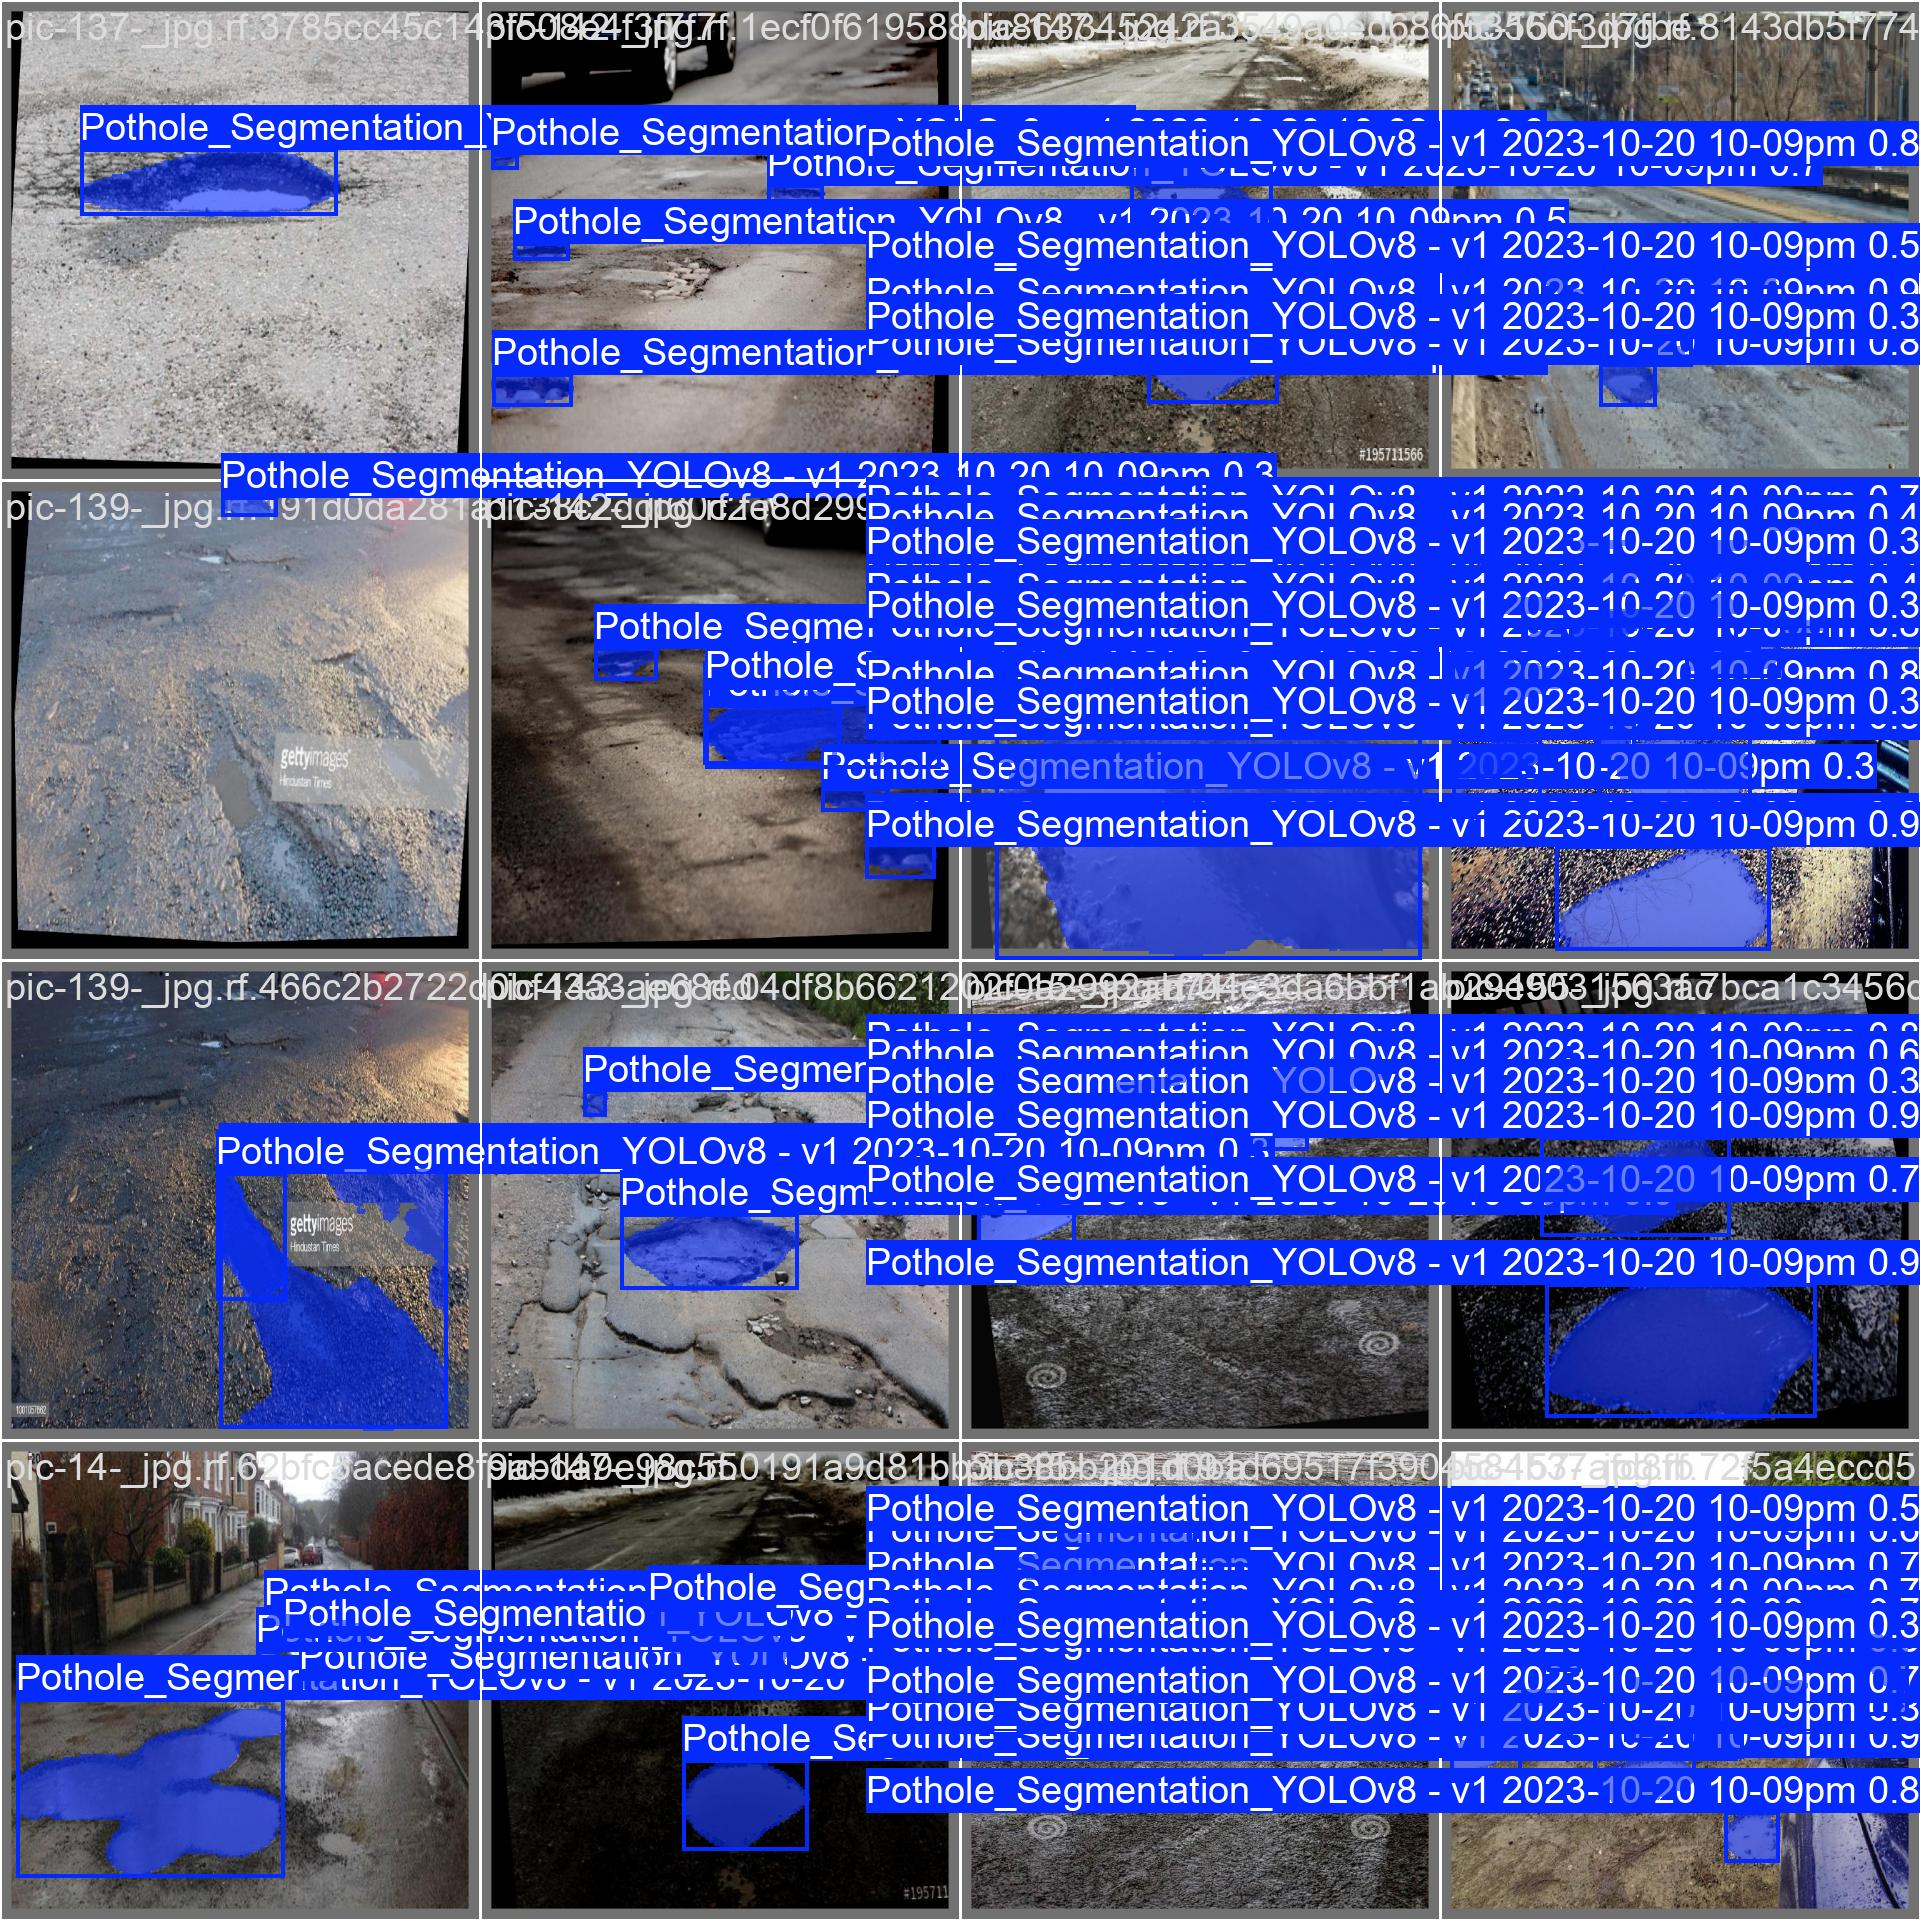

In [ ]:
Image("/content/runs/segment/train/val_batch1_pred.jpg", width = 800)

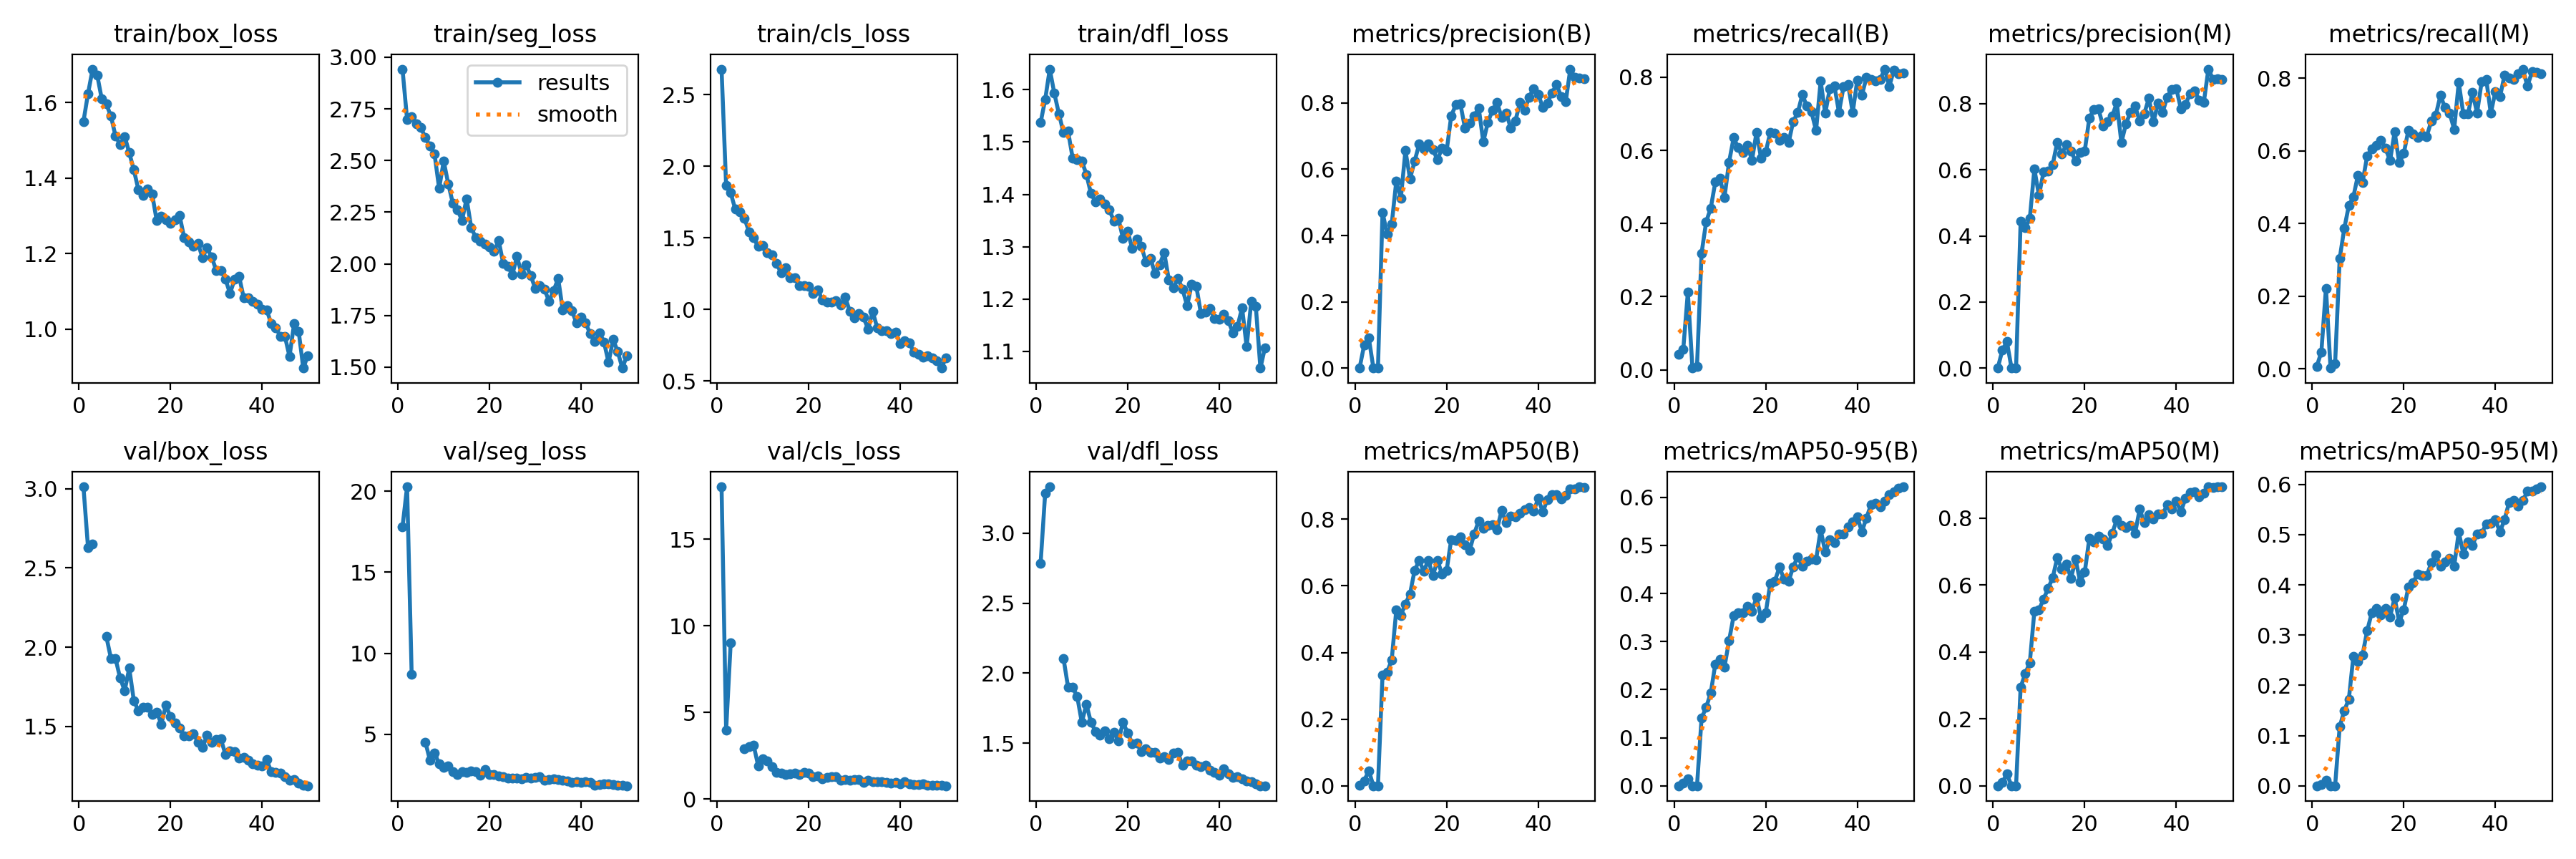

In [ ]:
Image("/content/runs/segment/train/results.png", width = 800)

In [ ]:
metrics = model.val()
# Print the evaluation metrics
print("Model Evaluation Metrics:", metrics)


Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1067.1±375.4 MB/s, size: 75.0 KB)


val: Scanning /content/Pothole-Detection-Segmentation-1/valid/labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  10%|█         | 1/10 [00:00<00:07,  1.21it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 2/10 [00:01<00:07,  1.12it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


                   all        155        405      0.852      0.827      0.896      0.622      0.854      0.827      0.894      0.596
Speed: 4.9ms preprocess, 13.1ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/segment/train2
Model Evaluation Metrics: ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac796250d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,  

In [ ]:
#Predict on Test Images using Trained Model
import os

#Load Trained Model
model = YOLO("/content/best.pt")

#Specify the test folder path
test_path = "/content/Pothole-Detection-Segmentation-1/test/images"

#List all images in the test folder
image_files = [os.path.join(test_path, f) for f in os.listdir(test_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

#Predict each images
for img_path in image_files:
  results = model.predict(source = img_path, save = True, conf = 0.20)


image 1/1 /content/Pothole-Detection-Segmentation-1/test/images/pic-83-_jpg.rf.bb2c9542504ada1d9fb91c59d6b55036.jpg: 640x640 1 Pothole, 20.2ms
Speed: 2.0ms preprocess, 20.2ms inference, 30.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict

image 1/1 /content/Pothole-Detection-Segmentation-1/test/images/pic-14-_jpg.rf.7c8be3943beae6cd6a5e49586bb9223d.jpg: 640x640 4 Potholes, 20.1ms
Speed: 1.9ms preprocess, 20.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict

image 1/1 /content/Pothole-Detection-Segmentation-1/test/images/pic-275-_jpg.rf.3b7d0d11e41a8dd2b836b39c752cc844.jpg: 640x640 1 Pothole, 20.1ms
Speed: 1.7ms preprocess, 20.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict

image 1/1 /content/Pothole-Detection-Segmentation-1/test/images/pic-7-_jpg.rf.b5fb72256321bba493c34d6b493b3547.jpg: 640x640 3 Potholes, 20.1ms
Speed: 1.6ms pre

In [ ]:
# Plot prediction on test images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# Specify the predict folder path
pred_path = '/content/runs/segment/predict'

# List all images in the predict folder
pred_image_files = [os.path.join(pred_path, img) for img in os.listdir(pred_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

# Number of images per row
images_per_row = 5

# Calculate the number of rows needed
n_rows = len(pred_image_files) // images_per_row + int(len(pred_image_files) % images_per_row != 0)

# Set figure size
fig, axs = plt.subplots(n_rows, images_per_row, figsize=(15, 3 * n_rows))

# Flatten axes if necessary (for easier iteration)
axs = axs.flatten()

# Loop through each image and display it
for i, img_path in enumerate(pred_image_files):
    img = mpimg.imread(img_path)      # Read the image
    axs[i].imshow(img)                # Show the image
    axs[i].axis('off')                # Turn off axis
    axs[i].set_title(f"Image {i+1}")  # Add title

# Hide any extra empty subplots (if the number of images is not a perfect multiple of images_per_row)
for j in range(i+1, len(axs)):
    axs[j].axis('off')  # Hide unused axes

# Display all images
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 216MB/s]


In [ ]:
results = model.predict(source = "/content/pot_Man.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/510) /content/pot_Man.mp4: 640x384 1 Pothole, 74.4ms
video 1/1 (frame 2/510) /content/pot_Man.mp4: 640x384 1 Pothole, 13.8ms
video 1/1 (frame 3/510) /content/pot_Man.mp4: 640x384 1 Pothole, 13.8ms
video 1/1 (frame 4/510) /content/pot_Man.mp4: 640x384 1 Pothole, 14.4ms
video 1/1 (frame 5/510) /content/pot_Man.mp4: 640x384 1 Pothole, 13.8ms
video 1/1 (frame 6/510) /content/pot_Man.mp4: 640x384 1 Pothole, 13.8ms
video 1/1 (frame 7/510) 

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pot_Man.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1_-JPW9TEWG_eyzWmT-jlfB2O5tzEiauW&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1_-JPW9TEWG_eyzWmT-jlfB2O5tzEiauW&confirm=t
To: /content/video2.mp4
100% 6.01M/6.01M [00:00<00:00, 207MB/s]


In [ ]:
results = model.predict(source = "/content/pot_Anj2.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/481) /content/pot_Anj2.mp4: 384x640 (no detections), 59.1ms
video 1/1 (frame 2/481) /content/pot_Anj2.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 3/481) /content/pot_Anj2.mp4: 384x640 1 Pothole, 13.9ms
video 1/1 (frame 4/481) /content/pot_Anj2.mp4: 384x640 (no detections), 16.0ms
video 1/1 (frame 5/481) /content/pot_Anj2.mp4: 384x640 1 Pothole, 15.5ms
video 1/1 (frame 6/481) /content/pot_Anj2.mp4: 384x640 (no detections), 1

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pot_Anj2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/file/d/1kUH5eQwCE0HNw5KIbxAp5t8XX_4wmP32/view?usp=sharing"

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1kUH5eQwCE0HNw5KIbxAp5t8XX_4wmP32
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1kUH5eQwCE0HNw5KIbxAp5t8XX_4wmP32/view?usp=sharing
To: /content/view?usp=sharing
97.5kB [00:00, 3.84MB/s]


In [ ]:
results = model.predict(source = "/content/pot_Anj.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/299) /content/pot_Anj.mp4: 640x384 (no detections), 17.5ms
video 1/1 (frame 2/299) /content/pot_Anj.mp4: 640x384 1 Pothole, 48.0ms
video 1/1 (frame 3/299) /content/pot_Anj.mp4: 640x384 (no detections), 51.8ms
video 1/1 (frame 4/299) /content/pot_Anj.mp4: 640x384 (no detections), 55.2ms
video 1/1 (frame 5/299) /content/pot_Anj.mp4: 640x384 (no detections), 88.9ms
video 1/1 (frame 6/299) /content/pot_Anj.mp4: 640x384 (no detections), 4

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pot_Anj.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
results = model.predict(source = "/content/pot_Man.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/510) /content/pot_Man.mp4: 640x384 1 Pothole, 31.1ms
video 1/1 (frame 2/510) /content/pot_Man.mp4: 640x384 1 Pothole, 41.7ms
video 1/1 (frame 3/510) /content/pot_Man.mp4: 640x384 1 Pothole, 37.8ms
video 1/1 (frame 4/510) /content/pot_Man.mp4: 640x384 1 Pothole, 30.8ms
video 1/1 (frame 5/510) /content/pot_Man.mp4: 640x384 1 Pothole, 37.0ms
video 1/1 (frame 6/510) /content/pot_Man.mp4: 640x384 1 Pothole, 28.2ms
video 1/1 (frame 7/510) 

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
!apt-get update && apt-get install -y ffmpeg #Install ffmpeg


from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pot_Man.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Execute ffmpeg command and check for errors
return_code = os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
if return_code != 0:
    raise RuntimeError(f"ffmpeg command failed with return code {return_code}")  # Raise an error if ffmpeg fails

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 184MB/s]


In [ ]:
results = model.predict(source = "/content/pothole2.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/733) /content/pothole2.mp4: 640x384 (no detections), 36.1ms
video 1/1 (frame 2/733) /content/pothole2.mp4: 640x384 (no detections), 28.7ms
video 1/1 (frame 3/733) /content/pothole2.mp4: 640x384 (no detections), 28.2ms
video 1/1 (frame 4/733) /content/pothole2.mp4: 640x384 (no detections), 33.7ms
video 1/1 (frame 5/733) /content/pothole2.mp4: 640x384 1 Pothole, 19.2ms
video 1/1 (frame 6/733) /content/pothole2.mp4: 640x384 (no detectio

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 261MB/s]


In [ ]:
results = model.predict(source = "/content/pothole3.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/919) /content/pothole3.mp4: 384x640 (no detections), 16.2ms
video 1/1 (frame 2/919) /content/pothole3.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 3/919) /content/pothole3.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 4/919) /content/pothole3.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 5/919) /content/pothole3.mp4: 384x640 (no detections), 14.4ms
video 1/1 (frame 6/919) /content/pothole3.mp4: 384x640 (no de

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole3.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 246MB/s]


In [ ]:
results = model.predict(source = "/content/pothole4.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/489) /content/pothole4.mp4: 384x640 1 Pothole, 15.0ms
video 1/1 (frame 2/489) /content/pothole4.mp4: 384x640 2 Potholes, 13.9ms
video 1/1 (frame 3/489) /content/pothole4.mp4: 384x640 2 Potholes, 15.7ms
video 1/1 (frame 4/489) /content/pothole4.mp4: 384x640 2 Potholes, 17.1ms
video 1/1 (frame 5/489) /content/pothole4.mp4: 384x640 2 Potholes, 19.7ms
video 1/1 (frame 6/489) /content/pothole4.mp4: 384x640 2 Potholes, 22.2ms
video 1/1 (fr

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole4.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 172MB/s]


In [ ]:
results = model.predict(source = "/content/pothole5.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/173) /content/pothole5.mp4: 384x640 (no detections), 15.7ms
video 1/1 (frame 2/173) /content/pothole5.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 3/173) /content/pothole5.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 4/173) /content/pothole5.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 5/173) /content/pothole5.mp4: 384x640 (no detections), 19.3ms
video 1/1 (frame 6/173) /content/pothole5.mp4: 384x640 (no de

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole5.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 222MB/s]


In [ ]:
results = model.predict(source = "/content/pothole1.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1058) /content/pothole1.mp4: 384x640 2 Potholes, 14.1ms
video 1/1 (frame 2/1058) /content/pothole1.mp4: 384x640 3 Potholes, 14.3ms
video 1/1 (frame 3/1058) /content/pothole1.mp4: 384x640 3 Potholes, 13.9ms
video 1/1 (frame 4/1058) /content/pothole1.mp4: 384x640 2 Potholes, 13.9ms
video 1/1 (frame 5/1058) /content/pothole1.mp4: 384x640 2 Potholes, 13.9ms
video 1/1 (frame 6/1058) /content/pothole1.mp4: 384x640 2 Potholes, 29.5ms
video 

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 214MB/s]


In [ ]:
results = model.predict(source = "/content/pothole6.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/557) /content/pothole6.mp4: 384x640 (no detections), 22.9ms
video 1/1 (frame 2/557) /content/pothole6.mp4: 384x640 (no detections), 19.2ms
video 1/1 (frame 3/557) /content/pothole6.mp4: 384x640 (no detections), 22.6ms
video 1/1 (frame 4/557) /content/pothole6.mp4: 384x640 (no detections), 21.2ms
video 1/1 (frame 5/557) /content/pothole6.mp4: 384x640 (no detections), 24.6ms
video 1/1 (frame 6/557) /content/pothole6.mp4: 384x640 (no de

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole6.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 266MB/s]


In [ ]:
results = model.predict(source = "/content/pothole7.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/219) /content/pothole7.mp4: 384x640 2 Potholes, 15.6ms
video 1/1 (frame 2/219) /content/pothole7.mp4: 384x640 2 Potholes, 13.9ms
video 1/1 (frame 3/219) /content/pothole7.mp4: 384x640 3 Potholes, 13.9ms
video 1/1 (frame 4/219) /content/pothole7.mp4: 384x640 2 Potholes, 42.7ms
video 1/1 (frame 5/219) /content/pothole7.mp4: 384x640 2 Potholes, 44.1ms
video 1/1 (frame 6/219) /content/pothole7.mp4: 384x640 2 Potholes, 23.0ms
video 1/1 (f

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole7.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 134MB/s]


In [ ]:
results = model.predict(source = "/content/pothole8.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/513) /content/pothole8.mp4: 384x640 (no detections), 22.6ms
video 1/1 (frame 2/513) /content/pothole8.mp4: 384x640 (no detections), 19.8ms
video 1/1 (frame 3/513) /content/pothole8.mp4: 384x640 (no detections), 48.1ms
video 1/1 (frame 4/513) /content/pothole8.mp4: 384x640 (no detections), 58.9ms
video 1/1 (frame 5/513) /content/pothole8.mp4: 384x640 (no detections), 44.6ms
video 1/1 (frame 6/513) /content/pothole8.mp4: 384x640 (no de

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole8.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 233MB/s]


In [ ]:
results = model.predict(source = "/content/pothole9.mp4", save = True, conf = 0.25, iou = 0.3)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/530) /content/pothole9.mp4: 384x640 1 Pothole, 15.2ms
video 1/1 (frame 2/530) /content/pothole9.mp4: 384x640 1 Pothole, 19.6ms
video 1/1 (frame 3/530) /content/pothole9.mp4: 384x640 1 Pothole, 13.9ms
video 1/1 (frame 4/530) /content/pothole9.mp4: 384x640 1 Pothole, 13.9ms
video 1/1 (frame 5/530) /content/pothole9.mp4: 384x640 2 Potholes, 18.3ms
video 1/1 (frame 6/530) /content/pothole9.mp4: 384x640 1 Pothole, 30.4ms
video 1/1 (frame 

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict/pothole9.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.